In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians

In [2]:
def plot_TMA():
    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    TMA_lon=[18.2130555555556, 18.5547222222222, 18.8469444444444, 19.3136111111111, 19.8280555555556, 19.2736111111111,
          18.9683333333333, 18.7547222222222, 18.5394444444444, 18.4572222222222, 17.9327777777778, 17.4569444444444,
          17.4077777777778, 17.2233333333333, 16.7077777777778, 16.2677777777778, 16.3183333333333, 16.4466666666667,
          17.5966666666667, 18.2130555555556];

    TMA_lat=[60.2994444444444, 60.2661111111111, 59.8827777777778, 60.0352777777778, 59.6736111111111, 59.5994444444444,
          59.255, 59.0419444444444, 58.8325, 58.7525, 58.5830555555556, 58.6163888888889, 58.9661111111111,
          58.9786111111111, 59.0119444444444, 59.0494444444444, 59.3238888888889, 59.7494444444444, 60.2327777777778,
          60.2994444444444];

    number_of_rwys = 4

    rwy1_lon=[17.9361345, 17.9791531944444];
    rwy1_lat=[59.6584189166667, 59.6638971944444 ];

    rwy2_lon=[17.9132249722222, 17.9237679722222];
    rwy2_lat=[59.637256, 59.6664016944444 ];

    rwy3_lon=[17.9507426111111, 17.9587480555556];
    rwy3_lat=[59.6263963888889, 59.6484673055556];

    central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
        
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)
 
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)

    
    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy1_lon,rwy1_lat, color="red")
    plt.plot(rwy2_lon,rwy2_lat, color="red")
    plt.plot(rwy3_lon,rwy3_lat, color="red")
    
    ELTOK_lon = 16.6503
    ELTOK_lat = 59.5861
    HMR_lon = 18.3917
    HMR_lat = 60.2794
    XILAN_lon = 19.0761
    XILAN_lat = 59.6594
    NILUG_lon = 17.8847
    NILUG_lat = 58.8158

    plt.plot(HMR_lon, HMR_lat, 'ro')
    plt.plot(NILUG_lon, NILUG_lat, 'ro')
    plt.plot(XILAN_lon, XILAN_lat, 'ro')
    plt.plot(ELTOK_lon, ELTOK_lat, 'ro')

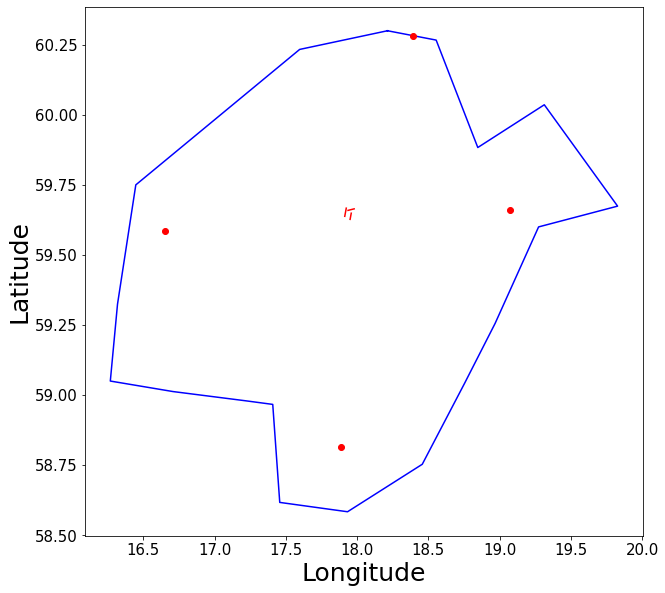

In [3]:
plot_TMA()

In [4]:
 def plot_horizontal_profile(df, linewidth=1):
    
    plot_TMA()
    
    if df.empty:
        return
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lons = flight_df["lon"]
        lats = flight_df["lat"]
        
        plt.plot(lons, lats, color='k', linewidth=linewidth)
        
    plt.title("temp")                   
    plt.savefig("temp.png")

In [6]:
def plot_vertical_profile(df, linewidth=1):
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['altitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
            
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

In [7]:
def plot_raw_vertical_profile(df, linewidth=1):
          
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['rawAltitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
            
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [8]:
filename = "../Data/ESSA/2019/osn_ESSA_states_TMA_2019/osn_arrival_ESSA_states_TMA_2019_10_week1.csv"
temp_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
temp_df.set_index(['flightId', 'sequence'], inplace = True)

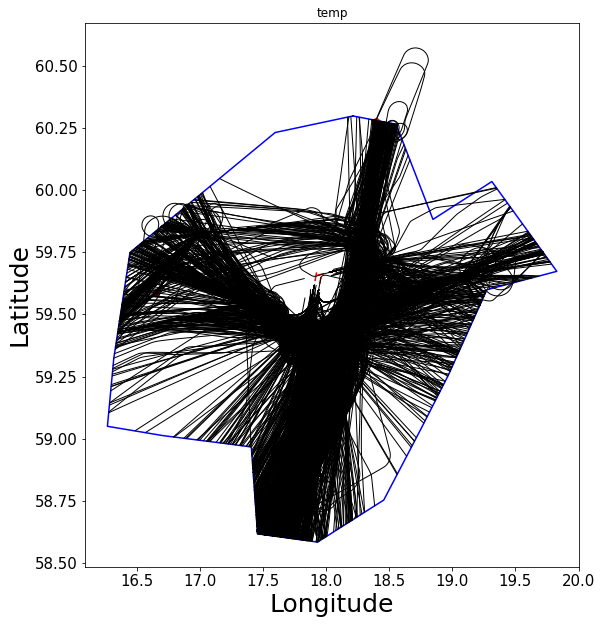

In [9]:
plot_horizontal_profile(temp_df)

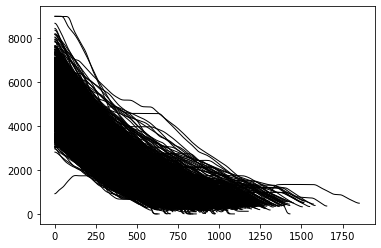

In [10]:
plot_vertical_profile(temp_df)

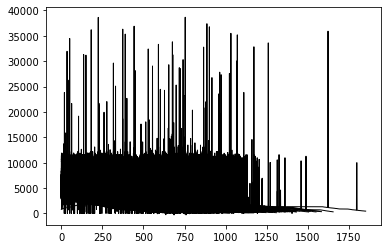

In [11]:
plot_raw_vertical_profile(temp_df)

In [12]:
def getPeriodFlightIds(df, timestamp_begin, timestamp_end):
    period_states_df = df[(df['timestamp'] >= timestamp_begin) & (df['timestamp'] <= timestamp_end)]
    
    flightIds = []
    
    for flight_id, new_df in period_states_df.groupby(level='flightId'):
        flightIds.append(flight_id)
        
    return flightIds

In [13]:
def getPeriodStatesDf(flightIds):
    
    period_states_df = pd.DataFrame(columns=['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'altitude', 'velocity', 'beginDate', 'endDate'],
                              dtype=str)
    period_states_df.set_index(['flightId', 'sequence'], inplace = True)

    for flight_id in flightIds:
    
        flight_df = df.loc[df.index.get_level_values('flightId') == flight_id]
    
        period_states_df = period_states_df.append( flight_df )
        
    return period_states_df

In [17]:
(year1, month1, day1, hour_begin) = (2019, 10, 1, 0)
(year2, month2, day2, hour_end) = (2019, 10, 2, 0)

DATE_TIME_BEGIN = datetime(int(year1), int(month1), int(day1), hour_begin, 0, 0, 0, timezone.utc)
DATE_TIME_END = datetime(int(year1), int(month2), int(day2), hour_end, 0, 0, 0, timezone.utc)

timestamp_begin = int(DATE_TIME_BEGIN.timestamp())   #float -> int
timestamp_end = int(DATE_TIME_END.timestamp())

df = temp_df

flightIds = getPeriodFlightIds(df, timestamp_begin, timestamp_end)

period_df = getPeriodStatesDf(flightIds)

print(len(period_df.index.get_level_values('flightId').unique()))

#period_df.to_csv("states_" + str(year) + "_" + str(month) + "_" + str(day1) +  ".csv",
#                      sep=' ', encoding='utf-8', float_format='%.3f', header=False, index=True)

269


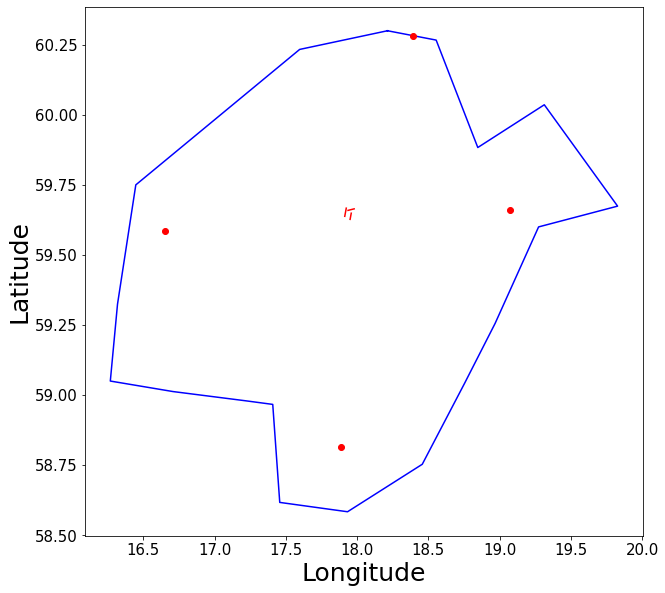

In [15]:
plot_horizontal_profile(period_df)

In [16]:
plot_vertical_profile(period_df)